In [1]:
# Importance of Data Cleaning

# 1. Missing Values: Missing data points in a dataset can lead to biased results.
#     Task 1: Load a dataset and identify which columns have missing values.
#     Task 2: Replace missing values in a dataset with the column mean or mode.
#     Task 3: Compare model performance with and without handling missing values.
    





In [2]:
# 2. Duplicate Data: Repeated data points can skew analysis and model results.
#     Task 1: Identify and remove duplicate entries from a dataset using a programming language or tool.
#     Task 2: Document the before-and-after dataset shape to understand the impact of duplicates.
#     Task 3: Explain to a classmate how duplicate data can affect prediction accuracy.
    
    
    

In [3]:
# 3. Incorrect Data Types: Data stored in incorrect formats can lead to parsing errors or incorrect analysis.
#     Task 1: Convert a column of string numbers to integers in a dataset.
#     Task 2: Identify and correct columns with inconsistent data types in a dataset.
#     Task 3: Discuss why correct data types are critical for feature engineering.
    
    
    

In [4]:
# 4. Outliers & Inconsistencies: Irregularities in data can mislead statistical analysis and model predictions.
#     Task 1: Visualize a dataset and identify outliers using a boxplot.
#     Task 2: Remove or adjust outliers and re-analyze the dataset.
#     Task 3: Research and report on a technique for handling outliers effectively.
    
    
    

=== Original Dataset ===
   ID   Age     Salary Department
0   1    25    50000.0      Sales
1   2    30    54000.0         HR
2   3   NaN    58000.0         IT
3   3    30    58000.0         IT
4   4    45        NaN        NaN
5   5  1000    62000.0    Finance
6   6    28  1200000.0      Sales
7   7    35    60000.0         HR

Missing Values Per Column:
ID            0
Age           1
Salary        1
Department    1
dtype: int64

R2 Score After Handling Missing Values: 0.03629537442856634

Shape before removing duplicates: (8, 4)
Shape after removing duplicates: (8, 4)

Why duplicates affect prediction accuracy:
 
Duplicate data can cause the model to overfit on repeated patterns and inflate feature importance.
It gives the illusion that certain patterns occur more frequently than they actually do.


Data Types After Fixing:
ID              int64
Age             Int64
Salary        float64
Department     object
dtype: object

Why correct data types matter:
 
Correct data types are e

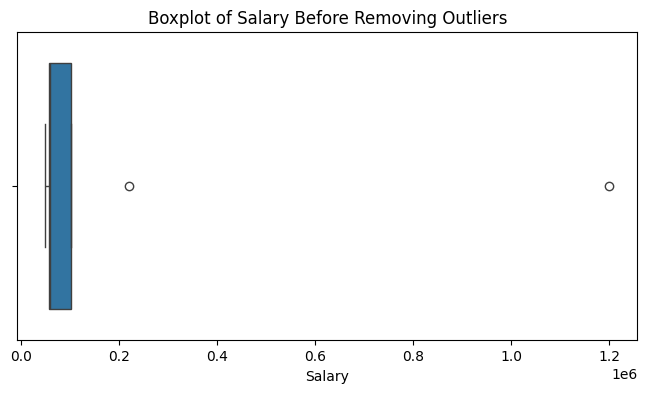

ValueError: data type <class 'numpy.object_'> not inexact

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -----------------------------------------------
# Create Synthetic Dataset
# -----------------------------------------------
np.random.seed(0)
data = pd.DataFrame({
    'ID': [1, 2, 3, 3, 4, 5, 6, 7],
    'Age': ['25', '30', np.nan, '30', '45', '1000', '28', '35'],  # Age as string and outlier
    'Salary': [50000, 54000, 58000, 58000, np.nan, 62000, 1200000, 60000],  # Outlier & missing
    'Department': ['Sales', 'HR', 'IT', 'IT', np.nan, 'Finance', 'Sales', 'HR']
})

print("=== Original Dataset ===")
print(data)

# ===============================================
# 1. Missing Values
# ===============================================

# Task 1.1: Identify missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# Task 1.2: Replace missing numeric with mean, categorical with mode
data['Salary'].fillna(data['Salary'].mean(), inplace=True)
data['Department'].fillna(data['Department'].mode()[0], inplace=True)

# Task 1.3: Compare model performance with and without imputation
# Convert Age to numeric for modeling
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data_cleaned = data.dropna()  # drop remaining missing values for comparison

X_raw = data_cleaned[['Age']]
y_raw = data_cleaned['Salary']

model = LinearRegression().fit(X_raw, y_raw)
pred = model.predict(X_raw)

print("\nR2 Score After Handling Missing Values:", r2_score(y_raw, pred))

# ===============================================
# 2. Duplicate Data
# ===============================================

# Task 2.1: Identify and remove duplicates
print("\nShape before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)

# Task 2.3: Explain to classmate
explanation = """
Duplicate data can cause the model to overfit on repeated patterns and inflate feature importance.
It gives the illusion that certain patterns occur more frequently than they actually do.
"""
print("\nWhy duplicates affect prediction accuracy:\n", explanation)

# ===============================================
# 3. Incorrect Data Types
# ===============================================

# Task 3.1: Convert 'Age' from string to integer
data['Age'] = pd.to_numeric(data['Age'], errors='coerce').round().astype('Int64')

# Task 3.2: Identify inconsistent types (already corrected above)
print("\nData Types After Fixing:")
print(data.dtypes)

# Task 3.3: Explain importance
importance = """
Correct data types are essential for feature engineering because math operations and model training
require the correct formats (e.g., integers for age, floats for income).
Incorrect types can cause errors and misinterpretation of data.
"""
print("\nWhy correct data types matter:\n", importance)

# ===============================================
# 4. Outliers & Inconsistencies
# ===============================================

# Task 4.1: Visualize outliers with boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Salary')
plt.title("Boxplot of Salary Before Removing Outliers")
plt.show()

# Task 4.2: Remove outliers using Z-score
from scipy.stats import zscore
numeric_cols = ['Age', 'Salary']
z_scores = np.abs(zscore(data[numeric_cols], nan_policy='omit'))
data_no_outliers = data[(z_scores < 3).all(axis=1)]

print("\nData After Removing Outliers:")
print(data_no_outliers)

# Task 4.3: Research technique for outliers
outlier_info = """
Z-score is a statistical technique that measures how many standard deviations
a data point is from the mean. A Z-score above 3 or below -3 is typically considered an outlier.
This method works well for normally distributed data.
"""
print("\nResearch on outlier handling:\n", outlier_info)

# ===============================================
# Final Cleaned Dataset Summary
# ===============================================
print("\n=== Final Cleaned Dataset ===")
print(data_no_outliers)
